In [76]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-06-26 20:15:59--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 142.250.141.128, 142.250.101.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.50M   114MB/s    in 0.9s    

2021-06-26 20:16:00 (114 MB/s) - ‘pizza_steak.zip.1’ saved [109579078/109579078]



In [77]:
ls

03-pizza-dad.jpeg    03-steak.jpeg                 pizza_steak/
03-pizza-dad.jpeg.1  03-steak.jpeg.1               pizza_steak.zip
03-pizza-dad.jpeg.2  10_food_classes_all_data/     pizza_steak.zip.1
03-pizza-dad.jpeg.3  10_food_classes_all_data.zip  sample_data/
03-pizza-dad.jpeg.4  __MACOSX/


In [78]:
cd /pizza_steak

[Errno 2] No such file or directory: '/pizza_steak'
/content


In [79]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
class_names = class_names[1:] # remove .DS_store
print(class_names)

['pizza' 'steak']


In [80]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

['741883.jpg']
Image shape: (512, 512, 3)


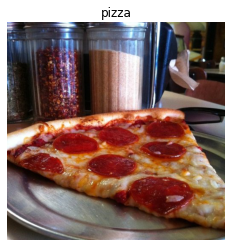

In [81]:
import os
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

#Creating out first neural network

In [82]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

train_data = train_datagen.flow_from_directory(train_dir,
                                            batch_size=32,
                                            target_size=(224,224),
                                            class_mode = "binary",
                                            seed = 42)
valid_data = valid_datagen.flow_from_directory(test_dir,
                                          batch_size=32,
                                          target_size=(224,224),
                                          class_mode = "binary",
                                          seed = 42)

model_1 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224,224,3)),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size = 2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1,activation="relu")
])

#compiling our cnn

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 9s 193ms/step - loss: 0.9875 - accuracy: 0.5980 - val_loss: 0.5185 - val_accuracy: 0.7900
Epoch 2/5
47/47 [==============================] - 9s 185ms/step - loss: 0.5889 - accuracy: 0.7487 - val_loss: 0.6683 - val_accuracy: 0.6640
Epoch 3/5
47/47 [==============================] - 9s 185ms/step - loss: 0.6052 - accuracy: 0.7320 - val_loss: 0.6854 - val_accuracy: 0.7920
Epoch 4/5
47/47 [==============================] - 9s 187ms/step - loss: 0.6547 - accuracy: 0.7940 - val_loss: 0.8669 - val_accuracy: 0.6740
Epoch 5/5
47/47 [==============================] - 9s 188ms/step - loss: 0.7693 - accuracy: 0.6547 - val_loss: 0.4747 - val_accuracy: 0.7760


In [83]:
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 28090)            

# using the classification model

In [84]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224,224,3)),
  tf.keras.layers.Dense(100,activation="relu"),
  tf.keras.layers.Dense(100,activation="relu"),
  tf.keras.layers.Dense(1,activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 177ms/step - loss: 4.2334 - accuracy: 0.6453 - val_loss: 2.3543 - val_accuracy: 0.5360
Epoch 2/5
47/47 [==============================] - 8s 172ms/step - loss: 1.3964 - accuracy: 0.6773 - val_loss: 0.6034 - val_accuracy: 0.7780
Epoch 3/5
47/47 [==============================] - 8s 177ms/step - loss: 0.5498 - accuracy: 0.7520 - val_loss: 0.4360 - val_accuracy: 0.7980
Epoch 4/5
47/47 [==============================] - 8s 174ms/step - loss: 0.4634 - accuracy: 0.7873 - val_loss: 0.5924 - val_accuracy: 0.7100
Epoch 5/5
47/47 [==============================] - 8s 174ms/step - loss: 0.4834 - accuracy: 0.7987 - val_loss: 0.6406 - val_accuracy: 0.7220


In [85]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 101       
Total params: 15,063,101
Trainable params: 15,063,101
Non-trainable params: 0
_________________________________________________________________


In [86]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [87]:
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directoy of images
                                               target_size=(224, 224), # Target size of images (height, width)
                                               class_mode="binary", # type of data you're working with
                                               batch_size=32) # size of minibatches to load data into

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [88]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential

In [89]:
model_3 = Sequential([
  Conv2D(10,3,activation="relu",strides=1,padding="valid",input_shape=(224,224,3)),
  Conv2D(10,3,activation="relu"),
  Conv2D(10,3,activation="relu"),
  Flatten(),
  Dense(1,activation="sigmoid")
])

In [90]:
model_3.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


In [91]:
model_3.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_7 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [92]:
len(train_data),len(test_data)

(47, 16)

In [93]:
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 196ms/step - loss: 1.1426 - accuracy: 0.5127 - val_loss: 0.6618 - val_accuracy: 0.6500
Epoch 2/5
47/47 [==============================] - 9s 189ms/step - loss: 0.5182 - accuracy: 0.7707 - val_loss: 0.5026 - val_accuracy: 0.7680
Epoch 3/5
47/47 [==============================] - 9s 188ms/step - loss: 0.4032 - accuracy: 0.8300 - val_loss: 0.4756 - val_accuracy: 0.7620
Epoch 4/5
47/47 [==============================] - 9s 189ms/step - loss: 0.3045 - accuracy: 0.8880 - val_loss: 0.4242 - val_accuracy: 0.8080
Epoch 5/5
47/47 [==============================] - 9s 186ms/step - loss: 0.1601 - accuracy: 0.9527 - val_loss: 0.4615 - val_accuracy: 0.8040


###here out data is getting overly fitted in the model, there we have to do regularization

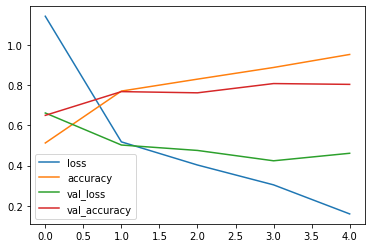

In [94]:
import pandas as pd
pd.DataFrame(history_3.history).plot()

In [95]:
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs=range(len(history.history["loss"]))


  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()
  
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

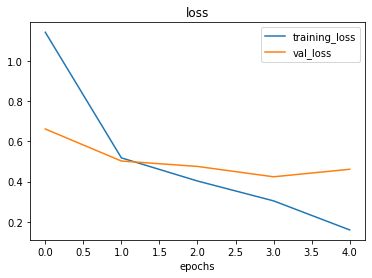

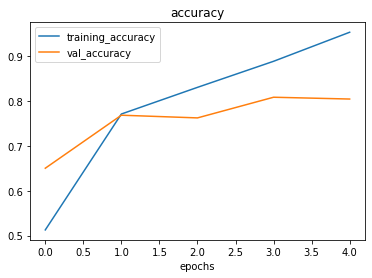

In [96]:
plot_loss_curves(history_3)

##Optimization the model by data augmentation

In [97]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                          rotation_range=0.2,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [98]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False)
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary")


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [99]:
augmented_images, augmented_labels = train_data_augmented.next()

In [100]:
model_4 = Sequential([
  Conv2D(10,3,activation="relu"),
  MaxPool2D(),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1,activation="sigmoid")
])
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])
model_4 = model_4.fit(train_data_augmented,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented),
                      validation_data=test_data,
                      validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 20s 424ms/step - loss: 0.7984 - accuracy: 0.4547 - val_loss: 0.6847 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 20s 416ms/step - loss: 0.6873 - accuracy: 0.5460 - val_loss: 0.6617 - val_accuracy: 0.6280
Epoch 3/5
47/47 [==============================] - 19s 415ms/step - loss: 0.6834 - accuracy: 0.5813 - val_loss: 0.6236 - val_accuracy: 0.7340
Epoch 4/5
47/47 [==============================] - 20s 416ms/step - loss: 0.6733 - accuracy: 0.5887 - val_loss: 0.6108 - val_accuracy: 0.7520
Epoch 5/5
47/47 [==============================] - 20s 418ms/step - loss: 0.6323 - accuracy: 0.6747 - val_loss: 0.6330 - val_accuracy: 0.6160


In [101]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                           target_size=(224,224),
                                                                           class_mode="binary",
                                                                           batch_size=32,
                                                                           shuffle=True)


Found 1500 images belonging to 2 classes.


In [102]:
model_5 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")                     
])

# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(), 
                metrics=["accuracy"])

# Fit the model
history_5 = model_5.fit(train_data_augmented_shuffled, # we're fitting on augmented and shuffled data now
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 20s 420ms/step - loss: 0.6635 - accuracy: 0.5760 - val_loss: 0.5939 - val_accuracy: 0.6700
Epoch 2/5
47/47 [==============================] - 20s 420ms/step - loss: 0.5737 - accuracy: 0.7053 - val_loss: 0.4796 - val_accuracy: 0.7720
Epoch 3/5
47/47 [==============================] - 20s 418ms/step - loss: 0.5115 - accuracy: 0.7467 - val_loss: 0.3972 - val_accuracy: 0.8220
Epoch 4/5
47/47 [==============================] - 20s 419ms/step - loss: 0.4805 - accuracy: 0.7720 - val_loss: 0.3363 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 20s 420ms/step - loss: 0.4644 - accuracy: 0.7920 - val_loss: 0.3522 - val_accuracy: 0.8560


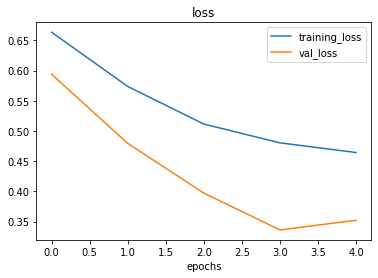

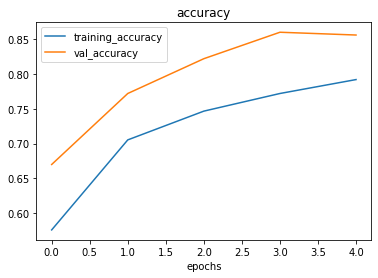

In [103]:
plot_loss_curves(history_5)

--2021-06-26 20:21:37--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.2’

03-steak.jpeg.2     100%[===================>]   1.89M  --.-KB/s    in 0.08s   

2021-06-26 20:21:37 (23.5 MB/s) - ‘03-steak.jpeg.2’ saved [1978213/1978213]



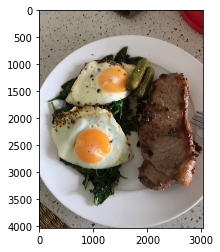

In [104]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)

In [105]:
#create a function to import an image and resize it to be able to used with our model
def load_and_prep_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  #decode the read file into a tensor
  img =tf.image.decode_image(img)
  #resizing
  img = tf.image.resize(img,size=[img_shape,img_shape])
  #rescaling
  img=img/255.
  return img

In [106]:
temp=steak
steak=tf.convert_to_tensor(steak)
img=tf.image.resize(steak,size=(224,224))
steak=img/255.
xtra = load_and_prep_image("03-steak.jpeg")

In [107]:
pred = model_5.predict(tf.expand_dims(xtra,axis=0))

In [108]:
class_names

array(['pizza', 'steak'], dtype='<U9')

In [109]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [110]:
def pred_and_plot(model,filename,class_names):
  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img,axis=0))

  pred_class = class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title("Prediction "+pred_class)
  plt.axis(False)

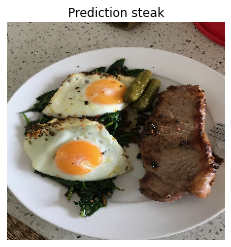

In [111]:
pred_and_plot(model_5,"03-steak.jpeg",class_names)

--2021-06-26 20:21:39--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.5’

03-pizza-dad.jpeg.5 100%[===================>]   2.74M  --.-KB/s    in 0.09s   

2021-06-26 20:21:40 (30.8 MB/s) - ‘03-pizza-dad.jpeg.5’ saved [2874848/2874848]



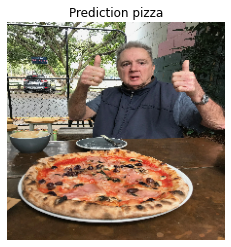

In [112]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_5, "03-pizza-dad.jpeg",class_names)


#Our model works... feeling pround lol xd haha lmao ded

#Multi class image classification using CNN
We will be working with ten classes of food.
1. Become one with the data
2. Preprocess the data
3. Create a model
4. Fit the model(Overfit it to make sure it works)
5. Evaluaet the model
6. Adjust different hyperparameters and improve the model
7. Repeat until satisfied

##Become one with the data

In [113]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref=zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2021-06-26 20:21:40--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 142.250.141.128, 142.250.101.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   262MB/s    in 1.9s    

2021-06-26 20:21:42 (262 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [114]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"


In [115]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_name=np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


['2916967.jpg']
Image shape: (512, 512, 3)


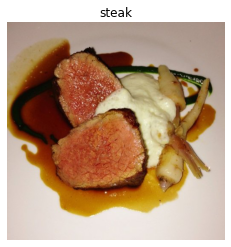

In [116]:
#visualize visualize visualize
import random
img = view_random_image(target_dir = train_dir,
                        target_class=random.choice(class_names))


##Preprocess the data

In [125]:
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


##Create a model(start with the baseline)
**Replicating the model from this site https://poloclub.github.io/cnn-explainer**

In [128]:
model_6 = Sequential([
  Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(),
  Conv2D(10,3,activation="relu"),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10,activation="softmax")
])

model_6.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])
history_6 = model_6.fit(train_data,
                            epochs=5,
                            steps_per_epoch=len(train_data),
                            validation_data=test_data,
                            validation_steps=len(test_data))



Epoch 1/5
235/235 [==============================] - 44s 185ms/step - loss: 2.1438 - accuracy: 0.2120 - val_loss: 1.9442 - val_accuracy: 0.3012
Epoch 2/5
235/235 [==============================] - 43s 182ms/step - loss: 1.8246 - accuracy: 0.3681 - val_loss: 1.8613 - val_accuracy: 0.3636
Epoch 3/5
235/235 [==============================] - 43s 182ms/step - loss: 1.4654 - accuracy: 0.5101 - val_loss: 1.9230 - val_accuracy: 0.3412
Epoch 4/5
235/235 [==============================] - 43s 181ms/step - loss: 0.8484 - accuracy: 0.7264 - val_loss: 2.5688 - val_accuracy: 0.2796
Epoch 5/5
235/235 [==============================] - 43s 182ms/step - loss: 0.3173 - accuracy: 0.9055 - val_loss: 3.4270 - val_accuracy: 0.2868


##Fit the model (we fitted the model in the above cell)

##Evaluate the model

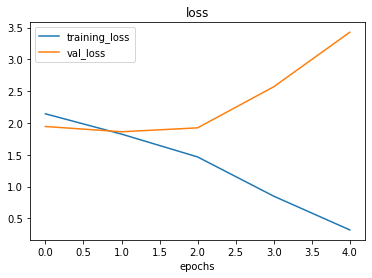

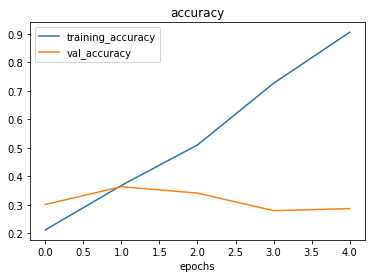

In [131]:
plot_loss_curves(history_6)

In [132]:
model_6.evaluate(test_data)

79/79 [==============================] - 10s 128ms/step - loss: 3.4270 - accuracy: 0.2868


[3.4270057678222656, 0.28679999709129333]

##Adjst the hyperparameters(try to beat our baseline model's accuracy)

In [135]:
train_datagen_augmented_shuffled = ImageDataGenerator(rescale=1/255.,
                                          rotation_range=0.2,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          horizontal_flip=True)

In [136]:
train_data_augmented_shuffled = train_datagen_augmented_shuffled.flow_from_directory(train_dir,
                                                                                     target_size=(224,224),
                                                                                     batch_size=32,
                                                                                     shuffle=True)

Found 7500 images belonging to 10 classes.


In [140]:
model_7 = Sequential([
  Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(),
  Conv2D(10,3,activation="relu"),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(),
  Conv2D(10,3,activation="relu"),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10,activation="softmax")
])

model_7.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
235/235 [==============================] - 101s 426ms/step - loss: 2.2182 - accuracy: 0.1775 - val_loss: 2.0828 - val_accuracy: 0.2372
Epoch 2/5
235/235 [==============================] - 100s 426ms/step - loss: 2.0998 - accuracy: 0.2479 - val_loss: 1.9689 - val_accuracy: 0.3212
Epoch 3/5
235/235 [==============================] - 100s 427ms/step - loss: 2.0389 - accuracy: 0.2769 - val_loss: 1.9195 - val_accuracy: 0.3120
Epoch 4/5
235/235 [==============================] - 100s 426ms/step - loss: 1.9828 - accuracy: 0.3051 - val_loss: 1.8425 - val_accuracy: 0.3580
Epoch 5/5
235/235 [==============================] - 101s 431ms/step - loss: 1.9488 - accuracy: 0.3188 - val_loss: 1.8567 - val_accuracy: 0.3452


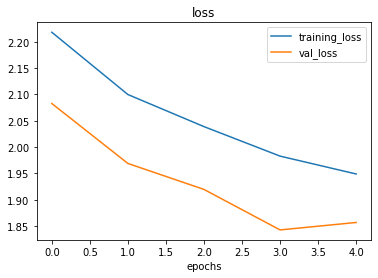

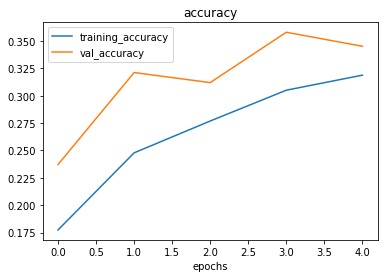

In [141]:
plot_loss_curves(history_7)

##Repeat until satisfied
We have tried most of the things we could, so there are some things we can try...
- recontructing model
- adjusting the learning rate
- try different method of data augmentation
- try **transfer learning**

